## **Text Mining Project**
# **Klasifikasi Multilabel Artikel Ilmiah menggunakan *Scientific Bidirectional Encoder Representations from Transformers* (SciBERT)**

**Anggota kelompok:**
- 2440009093 - Grady Simanjaya
- 2440013071 - Felicia Ferren
- 2440015442 - Diana Petrina

**Video Presentasi:** https://drive.google.com/file/d/12Sjw3av8C4ZBEmyrDm3srrnetWvRJvEu/view?usp=sharing

### **Import Dataset from Kaggle**

The data will be imported from Kaggle by using the API Token. Thus, first we need to import drive to access the kaggle.json file.

In [ ]:
# import drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# view files
! ls

drive  sample_data


In [ ]:
# set up to import dataset from kaggle
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# set TM_article as our project directory
%cd drive/My Drive/TM_article

/content/drive/My Drive/TM_article


Then, import and unzip the dataset from Kaggle

In [ ]:
# import dataset from kaggle
!kaggle datasets download -d vetrirah/janatahack-independence-day-2020-ml-hackathon

janatahack-independence-day-2020-ml-hackathon.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzip
!unzip janatahack-independence-day-2020-ml-hackathon.zip

Archive:  janatahack-independence-day-2020-ml-hackathon.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

train_df.head(5)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


here, we can see the overview of our train data. there are titles and abstracts along with the labels for the scientific papers.


then, we will do exploratory data analysis to understand our train_df better.



### **Exploratory Data Analysis**

In [ ]:
# print out the shape of the dataframe
print(train_df.shape) # there are 20972 observations with 9 variables.

(20972, 9)


In [ ]:
train_df.info()
# there are 6 labels for each observation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


now, we will try viewing the train_df, test_df, and sample_sub dataframe by seeing 5 first observation from each dataframe.

In [ ]:
train_df.head(5)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


we can see that the papers are divided into 6 labels, namely:
- Computer Science
- Physics
- Mathematics
- Statistics
- Quantitative Biology
- Quantitative Finance

In [ ]:
test_df.head(5)

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [ ]:
sample_sub.head(5)

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,0,0,0
1,20974,0,0,0,0,0,0
2,20975,0,0,0,0,0,0
3,20976,0,0,0,0,0,0
4,20977,0,0,0,0,0,0


In [ ]:
# the sample submission here is like a template for the competition submission.
# hence, we wont use the test_df, and will split the train_df into train, test, and validation set
sample_sub[["Computer Science","Physics","Mathematics","Statistics","Quantitative Biology","Quantitative Finance"]].apply(sample_sub.value_counts)

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,8989,8989,8989,8989,8989,8989


we can see that test_df here does not have labels and the sample_sub is like a template for the competition submission. hence, we wont use test_df and sample_sub, but we will split the train_df into train, test, and validation set instead.

This time, we seek the title and abstract from several observations.

In [ ]:
print('Title: \n', train_df['TITLE'].iloc[5])
print('Abstract: \n', train_df['ABSTRACT'].iloc[5])

Title: 
 On maximizing the fundamental frequency of the complement of an obstacle
Abstract: 
   Let $\Omega \subset \mathbb{R}^n$ be a bounded domain satisfying a
Hayman-type asymmetry condition, and let $ D $ be an arbitrary bounded domain
referred to as "obstacle". We are interested in the behaviour of the first
Dirichlet eigenvalue $ \lambda_1(\Omega \setminus (x+D)) $. First, we prove an
upper bound on $ \lambda_1(\Omega \setminus (x+D)) $ in terms of the distance
of the set $ x+D $ to the set of maximum points $ x_0 $ of the first Dirichlet
ground state $ \phi_{\lambda_1} > 0 $ of $ \Omega $. In short, a direct
corollary is that if \begin{equation} \mu_\Omega := \max_{x}\lambda_1(\Omega
\setminus (x+D)) \end{equation} is large enough in terms of $ \lambda_1(\Omega)
$, then all maximizer sets $ x+D $ of $ \mu_\Omega $ are close to each maximum
point $ x_0 $ of $ \phi_{\lambda_1} $.
Second, we discuss the distribution of $ \phi_{\lambda_1(\Omega)} $ and the
possibility to inscribe w

In [ ]:
print('Title: \n', train_df['TITLE'].iloc[20000])
print('Abstract: \n', train_df['ABSTRACT'].iloc[20000])

Title: 
 Asymmetric Spin-wave Dispersion on Fe(110): Direct Evidence of Dzyaloshinskii--Moriya Interaction
Abstract: 
   The influence of the Dzyaloshinskii-Moriya interaction on the spin-wave
dispersion in an Fe double layer grown on W(110) is measured for the first
time. It is demonstrated that the Dzyaloshinskii-Moriya interaction breaks the
degeneracy of spin waves and leads to an asymmetric spin-wave dispersion
relation. An extended Heisenberg spin Hamiltonian is employed to obtain the
longitudinal component of the Dzyaloshinskii-Moriya vectors from the
experimentally measured energy asymmetry.



as you can see here, we can tell that there are many symbols at the first sample. this might occur because the abstract contains mathematical symbols or equations. we will try remove them later in the cleansing process.

then, we can join the title and the abstract together into 'text' feature because we are expecting the joined text will better in representing the class (classifies better --> enhance the modelling).

In [ ]:
# we try join the title and the abstract
train_df['text'] = train_df['TITLE'] + train_df['ABSTRACT']
test_df['text'] = test_df['TITLE'] + test_df['ABSTRACT']

now, we see the number of samples for each class in the form of bar plot.

<BarContainer object of 6 artists>

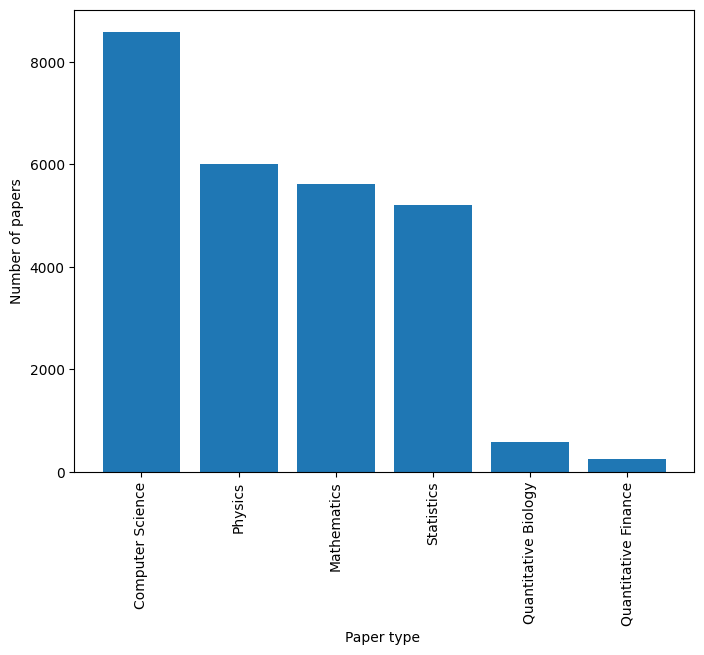

In [ ]:
# number of samples for each class
plot = train_df[["Computer Science","Physics","Mathematics","Statistics","Quantitative Biology","Quantitative Finance"]]
bar = plot.sum()
x = range(len(plot.columns))
plt.figure(figsize=(8, 6))
plt.ylabel('Number of papers')
plt.xlabel('Paper type ')
plt.xticks(x, plot.columns)
plt.xticks(rotation=90)
plt.bar(x, bar)

we can tell that most of the articles are in Computer Science scope, followed with Physics, Mathematics, and Statistics. Qualitative Biology and Qualitative Finance articles are considered rare in our data.

Then, we will see the labels in numbers for more specific result.

In [ ]:
# number of samples for each class (in numbers)
train_df[["Computer Science","Physics","Mathematics","Statistics","Quantitative Biology","Quantitative Finance"]].apply(train_df.value_counts)

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,12378,14959,15354,15766,20385,20723
1,8594,6013,5618,5206,587,249


Now, we see the number of samples based on classified category. we can see here, there are 8594 Computer Science labelled articles (or around 40.98% of all train_df). We can conclude that our data is imbalanced.

Then, we will see the distributions of articles with one or more labels.

<ipython-input-19-bdef74182a8e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_sums = train_df.iloc[:, 3:].sum(axis=1)


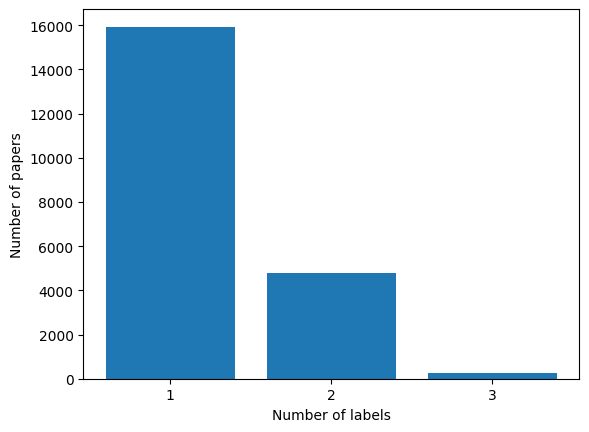

<Figure size 600x400 with 0 Axes>

In [ ]:
# number of samples that have multiple labels
row_sums = train_df.iloc[:, 3:].sum(axis=1)
multilabel_counts = row_sums.value_counts()

fig, ax = plt.subplots()

plt.figure(figsize=(6, 4))
ax.bar(multilabel_counts.index.astype(str), multilabel_counts.values)
ax.set_ylabel('Number of papers')
ax.set_xlabel('Number of labels')
plt.show()

From the plot, we can tell that most samples only have 1 label each. At most, a sample can have 3 labels at once, but there are only a very few samples that have these. And not more than 6000 samples have 2 labels.

Now, we see the distribution of text length

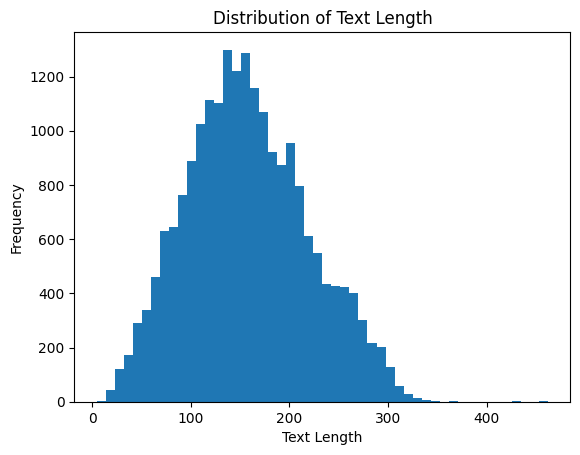

In [ ]:
train_df['length'] = train_df['text'].apply(lambda x: len(x.split()))

plt.hist(train_df['length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

The histogram above shows that there is a bit skewness in the distribution. Most samples have around 100-200 words in it. Most words count that a sample have in this dataset is not more than 500. And the least words count that a sample have in this dataset is less than 50. If we look at the graph thoroughly, we can see that there are a bit samples which have more than 400 text length, which are considered as outliers.

Later in the modelling, we will take the max_length of 320 because it's approximate boundary for our data text, where we can have most of the observations below the limit (and only a few that exceed the limit). We have to set the parameter max_length because SciBERT model has limitation on the maximum length of input sequence they can handle. So, if the input sequence exceed that length, it needs to be truncated or shortened to fit the model's requirement. On the other side, the ones which shorter than max_length will be padded until matching the maximum length.

Setting the appropiate max_length value is important, because we want to balance the trade-off between retaining important information in longer sequences and managing computational resources and model memory.

To build the model, first we need to install `transformers`

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.2 MB/s eta 0:00:00


Then, we import all libraries that will be needed to build the model

In [ ]:
import re
import copy
from tqdm.notebook import tqdm
import gc

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader

from transformers import (
    AutoTokenizer,
    AutoModel,
    get_linear_schedule_with_warmup
)

Next, we define the configuration that will be used in building our model

In [ ]:
class Config:
    def __init__(self):
        super(Config, self).__init__()

        self.SEED = 42 # random seed = 42; for reproducibility
        self.MODEL_PATH = 'allenai/scibert_scivocab_uncased' # the pretrained model
        self.NUM_LABELS = 6 # number of labels in our dataset

        # data
        self.TOKENIZER = AutoTokenizer.from_pretrained(self.MODEL_PATH) # using tokenizer from pretrained model
        self.MAX_LENGTH = 320 # the max length (already explained)
        self.BATCH_SIZE = 16 # number of batch size, where the data will be inputted into batch with this number of data in each batch
        self.TEST_SPLIT = 0.20 # for train-test splitting
        self.VALIDATION_SPLIT = 0.50 # for test-validation splitting

        # model
        self.DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # use cuda if available
        self.FULL_FINETUNING = True # we are doing fine tuning
        self.LR = 3e-5 # learning rate = 3.10^-5
        self.OPTIMIZER = 'AdamW' # optimizer = AdamW
        self.CRITERION = 'BCEWithLogitsLoss' # criterion = BCEWithLogitsLoss
        self.N_VALIDATE_DUR_TRAIN = 3 # for displaying the steps when training process occured
        self.N_WARMUP = 0 # num of warmup
        self.SAVE_BEST_ONLY = True # save model with best results
        self.EPOCHS = 1 # number of epoch(s) for training process

config = Config()

In this model, we will be using the tokenizer from pretrained model. We use the pretrained model scibert_scivocab_uncased, where the text is converted to lowercase before processing where we assume that capitalization may not carry significant meaning.

Hence, we will do fine-tuning from the pretrained model where the model will be trained on specific task. Before that, we use 8:1:1 train-test-validation split from the train_df.

We use AdamW (Adam with Weight Decay) optimizer. This optimizer applies weight decay to the parameters during the parameter update step. This helps prevent overfitting and improves the generalization of the model.

We also use BCEWithLogtisLoss (Binary Cross-Entropy with Logits Loss) as our loss function, where this function is suitable for binary classification and multiclass problems. BCEWithLogitsLoss will compute the model's loss based on the predicted logits and the target labels.

In [ ]:
train_df.head(5)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text,length
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps P...,269
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation i...,80
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,107
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,A finite element approximation for the stochas...,119
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,145


### **Data Preprocessing**

Now, we will get to the pre-processing. train_df will be cleansed using several ways.

In [ ]:
# preprocessing
def clean_text(text):
    text = text.split() # split input into individual token or word
    text = [x.strip() for x in text] # remove trailing whitespaces
    text = [x.replace('\n', ' ').replace('\t', ' ') for x in text] # replace new line and tab into space
    text = ' '.join(text) # join back the seperated words, sepereated with a space
    text = re.sub('([.,!?()])', r' \1 ', text) # add spaces around certain punctuation marks to separate them as individual tokens
    text = re.sub(r'\d+', '', text) # remove numbers/digits
    text = re.sub(r'[^\w]', ' ', text) # remove punctuation
    text = re.sub(r'\s+', ' ', text) # remove multiple whitespaces
    return text

def get_texts(df):
    texts = df['text'].apply(clean_text) # apply cleansing process
    texts = texts.values.tolist()
    return texts


def get_labels(df):
    labels = df.iloc[:, 3:-2].values # get the labels from the dataframe
    return labels

texts = get_texts(train_df)
labels = get_labels(train_df)

# try printing the first five data from train_df
for text, label in zip(texts[:5], labels[:5]):
    print(f'TEXT -\t{text}')
    print(f'LABEL -\t{label}')
    print()

TEXT -	Reconstructing Subject Specific Effect Maps Predictive models allow subject specific inference when analyzing disease related alterations in neuroimaging data Given a subject s data inference can be made at two levels global i e identifiying condition presence for the subject and local i e detecting condition effect on each individual measurement extracted from the subject s data While global inference is widely used local inference which can be used to form subject specific effect maps is rarely used because existing models often yield noisy detections composed of dispersed isolated islands In this article we propose a reconstruction method named RSM to improve subject specific detections of predictive modeling approaches and in particular binary classifiers RSM specifically aims to reduce noise due to sampling error associated with using a finite sample of examples to train classifiers The proposed method is a wrapper type algorithm that can be used with different binary class

In [ ]:
print(train_df['text'].iloc[1]) # before cleaning

Rotation Invariance Neural Network  Rotation invariance and translation invariance have great values in image
recognition tasks. In this paper, we bring a new architecture in convolutional
neural network (CNN) named cyclic convolutional layer to achieve rotation
invariance in 2-D symbol recognition. We can also get the position and
orientation of the 2-D symbol by the network to achieve detection purpose for
multiple non-overlap target. Last but not least, this architecture can achieve
one-shot learning in some cases using those invariance.



In [ ]:
texts[1] # after cleaning

'Rotation Invariance Neural Network Rotation invariance and translation invariance have great values in image recognition tasks In this paper we bring a new architecture in convolutional neural network CNN named cyclic convolutional layer to achieve rotation invariance in D symbol recognition We can also get the position and orientation of the D symbol by the network to achieve detection purpose for multiple non overlap target Last but not least this architecture can achieve one shot learning in some cases using those invariance '

If we compare the text before and after cleaning above, we can see that there are no numbers, symbols, and multiple space in our cleaned text.

In [ ]:
class TransformerDataset(Dataset):
    def __init__(self, df, indices, set_type=None):
        super(TransformerDataset, self).__init__()

        # get text, labels, tokenizer, and max_length
        df = df.iloc[indices]
        self.texts = get_texts(df)
        self.set_type = set_type
        if self.set_type != 'test':
            self.labels = get_labels(df)

        self.tokenizer = config.TOKENIZER
        self.max_length = config.MAX_LENGTH

    def __len__(self):
        return len(self.texts) # get the length for the text

    def __getitem__(self, index):
        # tokenization
        # sets the max_length, pads the sequence if text length < max_length or truncate if text length > max_length
        # return tensors for input ids and attention mask
        tokenized = self.tokenizer.encode_plus(
            self.texts[index],
            max_length=self.max_length,
            pad_to_max_length=True,
            truncation=True,
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt'
        )
        input_ids = tokenized['input_ids'].squeeze()
        attention_mask = tokenized['attention_mask'].squeeze()

        if self.set_type != 'test':
            return {
                'input_ids': input_ids.long(),
                'attention_mask': attention_mask.long(),
                'labels': torch.Tensor(self.labels[index]).float(),
            }

        return {
            'input_ids': input_ids.long(),
            'attention_mask': attention_mask.long(),
        }

In [ ]:
# train-val split
# split train_df into train and test set, then split test set into test and validation test
# ratio of train, test, validation set: 8:1:1
np.random.seed(config.SEED)

dataset_size = len(train_df)
indices = list(range(dataset_size))
test_split = int(np.floor(config.TEST_SPLIT * dataset_size))
np.random.shuffle(indices)

train_indices, test_indices = indices[test_split:], indices[:test_split]

test_size = len(test_indices)
valid_split = int(np.floor(config.VALIDATION_SPLIT * test_size))

test_indices, val_indices = test_indices[valid_split:], test_indices[:valid_split]

In [ ]:
# print the length of train, test, and validation set
print(len(train_df))
print(len(train_indices), len(test_indices), len(val_indices))

20972
16778 2097 2097


The steps in splitting process:
1. train-test split; we split the train_df into train and test set with 8:2 ratio.
2. test-validation split; we split the test set into test and validation test with 1:1 ratio.
Hence, we will have 8:1:1 ratio for train-test-validation set.

The result above shows that there are actually 20972 data in the whole dataset. And after the splitting process, there will be 16778 data for training, 2097 data for validation, and 2097 for testing.

In [ ]:
train_data = TransformerDataset(train_df, train_indices)
val_data = TransformerDataset(train_df, val_indices)

train_dataloader = DataLoader(train_data, batch_size=config.BATCH_SIZE)
val_dataloader = DataLoader(val_data, batch_size=config.BATCH_SIZE)

b = next(iter(train_dataloader))
for k, v in b.items():
    print(f'{k} shape: {v.shape}')

input_ids shape: torch.Size([16, 320])
attention_mask shape: torch.Size([16, 320])
labels shape: torch.Size([16, 6])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Now, we have the input_ids and attention_mask tensor.

### **Building the Model**

Now, we will start the modelling process by defining the Model from pre-trained model.

In [ ]:
class Model(nn.Module):
    def __init__(self):
        # initialize the model
        super(Model, self).__init__()

        # loads the pretrained model
        self.transformer_model = AutoModel.from_pretrained(
            config.MODEL_PATH
        )
        # set dropout layer with dropout rate = 0.3 (regularize the model by randomly zeroing out input elements during training)
        self.dropout = nn.Dropout(0.3)
        self.output = nn.Linear(768, config.NUM_LABELS) # map the output into desired num of labels (6)

    # forward pass
    def forward(
        self,
        input_ids,
        attention_mask=None,
        token_type_ids=None
        ):

        outputs = self.transformer_model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)
        o2 = outputs[1]
        x = self.dropout(o2)
        x = self.output(x)

        return x

In [ ]:
device = config.DEVICE
device

device(type='cuda')

Then, we define the validation and training process:

In [ ]:
def val(model, val_dataloader, criterion):

    val_loss = 0
    true, pred = [], []

    # set model.eval() every time during evaluation
    model.eval()

    for step, batch in enumerate(val_dataloader):
        # unpack the batch contents and push them to the device (cuda or cpu).
        b_input_ids = batch['input_ids'].to(device)
        b_attention_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        # using torch.no_grad() during validation/inference is faster -
        # - since it does not update gradients.
        with torch.no_grad():
            # forward pass
            logits = model(input_ids=b_input_ids, attention_mask=b_attention_mask)

            # calculate loss
            loss = criterion(logits, b_labels)
            val_loss += loss.item()

            # since we're using BCEWithLogitsLoss, to get the predictions -
            # - sigmoid has to be applied on the logits first
            logits = torch.sigmoid(logits)
            logits = np.round(logits.cpu().numpy()) # round to 0 or 1
            labels = b_labels.cpu().numpy()

            # the tensors are detached from the gpu and put back on -
            # - the cpu, and then converted to numpy in order to -
            # - use sklearn's metrics.

            # store labels and predictions in true & pred lists
            pred.extend(logits)
            true.extend(labels)

    # calculate val loss, accuracym and micro f1 score
    avg_val_loss = val_loss / len(val_dataloader)
    print('Val loss:', avg_val_loss)
    print('Val accuracy:', accuracy_score(true, pred))

    val_micro_f1_score = f1_score(true, pred, average='micro')
    print('Val micro f1 score:', val_micro_f1_score)
    return val_micro_f1_score


def train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, epoch):

    # we validate config.N_VALIDATE_DUR_TRAIN times during the training loop
    nv = config.N_VALIDATE_DUR_TRAIN
    temp = len(train_dataloader) // nv
    temp = temp - (temp % 100)
    validate_at_steps = [temp * x for x in range(1, nv + 1)]

    train_loss = 0
    for step, batch in enumerate(tqdm(train_dataloader,
                                      desc='Epoch ' + str(epoch))):
        # set model.eval() every time during training
        model.train()

        # unpack the batch contents and push them to the device (cuda or cpu).
        b_input_ids = batch['input_ids'].to(device)
        b_attention_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        # clear accumulated gradients
        optimizer.zero_grad()

        # forward pass
        logits = model(input_ids=b_input_ids, attention_mask=b_attention_mask)

        # calculate loss
        loss = criterion(logits, b_labels)
        train_loss += loss.item()

        # backward pass
        loss.backward()

        # update weights
        optimizer.step()

        # update scheduler
        scheduler.step()

        # display step
        if step in validate_at_steps:
            print(f'-- Step: {step}')
            _ = val(model, val_dataloader, criterion)

    # calculate training loss
    avg_train_loss = train_loss / len(train_dataloader)
    print('Training loss:', avg_train_loss)

In [ ]:
# import metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

Lastly, we will define the run function which combines all the training and validation process step by step.

In [ ]:
# define the run()
def run():
    # setting a seed ensures reproducible results.
    # seed may affect the performance too.
    torch.manual_seed(config.SEED)
    # define loss function
    criterion = nn.BCEWithLogitsLoss()

    # define the parameters to be optmized -
    # - and add regularization
    if config.FULL_FINETUNING:
        param_optimizer = list(model.named_parameters())
        no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
        # model parameters grouped into two sets: weight_decay = 0.001 & weight_decay = 0.0
        optimizer_parameters = [
            {
                "params": [
                    p for n, p in param_optimizer if not any(nd in n for nd in no_decay)
                ],
                "weight_decay": 0.001,
            },
            {
                "params": [
                    p for n, p in param_optimizer if any(nd in n for nd in no_decay)
                ],
                "weight_decay": 0.0,
            },
        ]
        optimizer = optim.AdamW(optimizer_parameters, lr=config.LR)

    # create scheduler
    num_training_steps = len(train_dataloader) * config.EPOCHS
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps
    )

    # training n validation
    max_val_micro_f1_score = float('-inf')
    for epoch in range(config.EPOCHS):
        train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, epoch)
        val_micro_f1_score = val(model, val_dataloader, criterion)

        # for saving model
        if config.SAVE_BEST_ONLY:
            if val_micro_f1_score > max_val_micro_f1_score:
                best_model = copy.deepcopy(model)
                best_val_micro_f1_score = val_micro_f1_score

                model_name = 'scibert_best_model'
                torch.save(best_model.state_dict(), model_name + '.pt')

                print(f'--- Best Model. Val loss: {max_val_micro_f1_score} -> {val_micro_f1_score}')
                max_val_micro_f1_score = val_micro_f1_score

    return best_model, best_val_micro_f1_score

In [ ]:
# initialize the model
model = Model()
model.to(device);

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# run the model and get the best model along with the best validation micro f1 score
best_model, best_val_micro_f1_score = run()

Epoch 0:   0%|          | 0/1049 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


-- Step: 300
Val loss: 0.18420310595044584
Val accuracy: 0.676204101096805
Val micro f1 score: 0.8225074037512339


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


-- Step: 600
Val loss: 0.16649036956104366
Val accuracy: 0.6943252265140677
Val micro f1 score: 0.8396858839302814


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


-- Step: 900
Val loss: 0.16138761518805317
Val accuracy: 0.7000476871721507
Val micro f1 score: 0.8404296125815113


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Training loss: 0.18325409614210247
Val loss: 0.15601174711165103
Val accuracy: 0.7076776347162613
Val micro f1 score: 0.8475864690231851
--- Best Model. Val loss: -inf -> 0.8475864690231851


### Hyperparameter Tuning

#### Tuning Process

In this step, we will use Optuna as the hyperparameter optimization framework. Thus, first we need to install `optuna`

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.3 MB/s eta 0:00:00


In [ ]:
import optuna

# from sklearn.metrics import f1_score, accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# import torch
# from torch.optim import Adam
# from transformers import AutoModel, AutoTokenizer

In [ ]:
device = config.DEVICE
device

device(type='cuda')

Now, we will define the hyperparameters we will try to tune:
1. Learning rate: from $1e^-6$ until $1e^-3$
2. Weight decay: from $1e^-5$ until $1e^-3$
3. Optimizer: ['AdamW', 'SGD', 'RMSprop'}



In [ ]:
# the parameter we tune are learning rate, weight decay, and the optimizer

# for defining weight decay into tuning process
def get_optimizer_parameters(model, weight_decay):
    # Specify the parameters to be optimized and apply weight decay
    param_optimizer = list(model.named_parameters())
    no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
    optimizer_parameters = [
        {"params": [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         "weight_decay": weight_decay},
        {"params": [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         "weight_decay": 0.0}
    ]
    return optimizer_parameters

# for defining hyperparameters and tuning process
def objective(trial):
    # Define the search space for hyperparameters
    lr = trial.suggest_loguniform('lr', 1e-6, 1e-3)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-3)
    # batch_size = trial.suggest_categorical('batch_size', [8, 16, 32])
    optimizer_name = trial.suggest_categorical('optimizer', ['AdamW', 'SGD', 'RMSprop'])

    # Update the config object with the sampled hyperparameters
    config.LR = lr
    config.OPTIMIZER = optimizer_name

    # Reinitialize the model and optimizer with the new hyperparameters
    model_tuning = Model()
    model_tuning.to(device)
    optimizer_parameters = get_optimizer_parameters(model_tuning, weight_decay)

    if optimizer_name == 'AdamW':
        optimizer = optim.AdamW(optimizer_parameters, lr=config.LR)
    elif optimizer_name == 'SGD':
        optimizer = optim.SGD(optimizer_parameters, lr=config.LR)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(optimizer_parameters, lr=config.LR)

    # Train and evaluate the model
    best_model, best_val_micro_f1_score = run(model_tuning, optimizer)

    # Return the evaluation metric value (e.g., validation micro F1 score) as the objective value to minimize or maximize
    return -best_val_micro_f1_score

and this is the run function for the tuning process:

In [ ]:
def run(model, optimizer):
    # Setting a seed ensures reproducible results.
    torch.manual_seed(config.SEED)

    criterion = nn.BCEWithLogitsLoss()

    num_training_steps = len(train_dataloader) * config.EPOCHS
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps
    )

    max_val_micro_f1_score = float('-inf')
    best_model = None

    for epoch in range(config.EPOCHS):
        train_loss = 0
        model.train()

        for step, batch in enumerate(tqdm(train_dataloader, desc='Epoch ' + str(epoch))):
            # Unpack the batch contents and push them to the device (cuda or cpu).
            b_input_ids = batch['input_ids'].to(device)
            b_attention_mask = batch['attention_mask'].to(device)
            b_labels = batch['labels'].to(device)

            # Clear accumulated gradients
            optimizer.zero_grad()

            # Forward pass
            logits = model(input_ids=b_input_ids, attention_mask=b_attention_mask)

            # Calculate loss
            loss = criterion(logits, b_labels)
            train_loss += loss.item()

            # Backward pass
            loss.backward()

            # Update weights
            optimizer.step()

            # Update scheduler
            scheduler.step()

        avg_train_loss = train_loss / len(train_dataloader)
        print('Training loss:', avg_train_loss)

        # Validation after each epoch
        val_micro_f1_score = val(model, val_dataloader, criterion)

    return best_model, best_val_micro_f1_score

In [ ]:
# perform the hyperparameter tuning with 4 trials
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=4)

# display the best trial out of the num of trials
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# note: the batch_size is still 16 (not changed because we did not re-run or re-define the dataloader part)

[I 2023-06-22 00:46:20,899] A new study created in memory with name: no-name-fffb6a05-6070-4312-be16-7697f95ff29a
<ipython-input-49-527296c4fdbc>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-6, 1e-3)
<ipython-input-49-527296c4fdbc>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-3)
Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNo

Epoch 0:   0%|          | 0/1049 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Training loss: 0.2961335306910814


[I 2023-06-22 01:02:10,651] Trial 0 finished with value: -0.8463157894736841 and parameters: {'lr': 1.5450076892773426e-06, 'weight_decay': 1.559873651748936e-05, 'batch_size': 8, 'optimizer': 'RMSprop'}. Best is trial 0 with value: -0.8463157894736841.


Val loss: 0.2445709662455501
Val accuracy: 0.6509298998569385
Val micro f1 score: 0.7990590080376397


<ipython-input-49-527296c4fdbc>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-6, 1e-3)
<ipython-input-49-527296c4fdbc>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-3)
Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias',

Epoch 0:   0%|          | 0/1049 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Training loss: 0.6222823960537905


[I 2023-06-22 01:17:50,814] Trial 1 finished with value: -0.8463157894736841 and parameters: {'lr': 2.6333546386345314e-05, 'weight_decay': 0.00029275715687161746, 'batch_size': 8, 'optimizer': 'SGD'}. Best is trial 0 with value: -0.8463157894736841.


Val loss: 0.5914437662471425
Val accuracy: 0.11015736766809728
Val micro f1 score: 0.21914293045932767


<ipython-input-49-527296c4fdbc>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-6, 1e-3)
<ipython-input-49-527296c4fdbc>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-3)
Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias',

Epoch 0:   0%|          | 0/1049 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Training loss: 0.44700001585017624


[I 2023-06-22 01:33:42,970] Trial 2 finished with value: -0.8463157894736841 and parameters: {'lr': 0.00034555033260849426, 'weight_decay': 0.00032233793706706106, 'batch_size': 16, 'optimizer': 'AdamW'}. Best is trial 0 with value: -0.8463157894736841.


Val loss: 0.4384839986309861
Val accuracy: 0.0
Val micro f1 score: 0.0


<ipython-input-49-527296c4fdbc>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-6, 1e-3)
<ipython-input-49-527296c4fdbc>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-3)
Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias',

Epoch 0:   0%|          | 0/1049 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Training loss: 0.21707617166186652


[I 2023-06-22 01:49:32,461] Trial 3 finished with value: -0.8463157894736841 and parameters: {'lr': 5.231007732120936e-06, 'weight_decay': 0.0007353509238131905, 'batch_size': 8, 'optimizer': 'RMSprop'}. Best is trial 0 with value: -0.8463157894736841.


Val loss: 0.186755738475106
Val accuracy: 0.6828803051979018
Val micro f1 score: 0.8294392523364486
Best trial:
  Value:  -0.8463157894736841
  Params: 
    lr: 1.5450076892773426e-06
    weight_decay: 1.559873651748936e-05
    batch_size: 8
    optimizer: RMSprop


In [ ]:
# After hyperparameter tuning is complete
# Get the best hyperparameters from the study
best_trial = study.best_trial
best_lr = best_trial.params['lr']
best_weight_decay = best_trial.params['weight_decay']
best_optimizer = best_trial.params['optimizer']

Here, we will print the best parameter the optuna recommend to see their value.

In [ ]:
print(best_lr)
print(best_weight_decay)
print(best_optimizer)

1.5450076892773426e-06
1.559873651748936e-05
RMSprop


#### Run Tuned Model

In [ ]:
best_lr = 1.5450076892773426e-06
best_weight_decay = 1.559873651748936e-05

we try re-defining the run function using the best hyperparamter that we've got from the tuning porcess. then, we will do the training and validation process again using the new hyperparameters.

In [ ]:
# re-define the run() with using the hyperparameters we use
def run_tuned_model(model):
    # setting a seed ensures reproducible results.
    # seed may affect the performance too.
    torch.manual_seed(config.SEED)

    criterion = nn.BCEWithLogitsLoss()

    # define the parameters to be optmized -
    # - and add regularization
    if config.FULL_FINETUNING:
        param_optimizer = list(model.named_parameters())
        no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
        optimizer_parameters = [
            {
                "params": [
                    p for n, p in param_optimizer if not any(nd in n for nd in no_decay)
                ],
                "weight_decay": best_weight_decay,
            },
            {
                "params": [
                    p for n, p in param_optimizer if any(nd in n for nd in no_decay)
                ],
                "weight_decay": 0.0,
            },
        ]
        optimizer = optim.RMSprop(optimizer_parameters, lr=best_lr)

    num_training_steps = len(train_dataloader) * config.EPOCHS
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps
    )

    max_val_micro_f1_score = float('-inf')
    for epoch in range(config.EPOCHS):
        train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, epoch)
        val_micro_f1_score = val(model, val_dataloader, criterion)

        if config.SAVE_BEST_ONLY:
            if val_micro_f1_score > max_val_micro_f1_score:
                best_model = copy.deepcopy(model)
                best_val_micro_f1_score = val_micro_f1_score

                model_name = 'scibert_tuned_model'
                torch.save(best_model.state_dict(), model_name + '.pt')

                print(f'--- Best Model. Val loss: {max_val_micro_f1_score} -> {val_micro_f1_score}')
                max_val_micro_f1_score = val_micro_f1_score

    return best_model, best_val_micro_f1_score

In [ ]:
model_tuned = Model()
model_tuned.to(device);

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# run the tuned model
best_model, best_val_micro_f1_score = run_tuned_model(model = model_tuned)

Epoch 0:   0%|          | 0/1049 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


-- Step: 300
Val loss: 0.32459329700831213
Val accuracy: 0.5283738674296614
Val micro f1 score: 0.6732491389207805


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


-- Step: 600
Val loss: 0.27353713063128066
Val accuracy: 0.6165951359084406
Val micro f1 score: 0.7752184273232725


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


-- Step: 900
Val loss: 0.25752311470833694
Val accuracy: 0.637100619933238
Val micro f1 score: 0.7877947295423022


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Training loss: 0.32170129038244344
Val loss: 0.2557662647556175
Val accuracy: 0.6380543633762518
Val micro f1 score: 0.7896722939424032
--- Best Model. Val loss: -inf -> 0.7896722939424032


### Summary from the Modelling and Hyperparameter Tuning

This is the result from the model without parameter tuning:
> Training loss: 0.18325409614210247
>
> Val loss: 0.15601174711165103
>
> Val accuracy: 0.7076776347162613
>
> Val micro f1 score: 0.8475864690231851
>
> --- Best Model. Val loss: -inf -> 0.8475864690231851

and this is the result from the model after parameter tuning:
> Training loss: 0.32170129038244344
>
> Val loss: 0.2557662647556175
>
> Val accuracy: 0.6380543633762518
>
> Val micro f1 score: 0.7896722939424032
>
> --- Best Model. Val loss: -inf -> 0.7896722939424032


From the result above, we can see that the model without parameter tuning has lower training loss & validation loss, and higher validation accuracy and validation micro f1 score. This means that the model without tuning already is the best model. Hence, we will use the model before tuning as our final model.

### Testing

Now, we will do the testing process.

In [ ]:
# Call the final model for testing process
best_model = Model()  # Create an instance of the model
best_model.load_state_dict(torch.load('scibert_best_model.pt'))  # Load the trained weights
best_model.to(device)  # Move the model to the appropriate device (CPU or GPU)

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model(
  (transformer_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31090, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
# data loader
test_data = TransformerDataset(train_df, test_indices, set_type='test')
test_dataloader = DataLoader(test_data, batch_size=config.BATCH_SIZE)

In [ ]:
def predict(model):
    val_loss = 0
    test_pred = []
    model.eval()
    for step, batch in enumerate(test_dataloader):
        # Unpack the batch contents and push them to the device (cuda or cpu).
        b_input_ids = batch['input_ids'].to(device)
        b_attention_mask = batch['attention_mask'].to(device)

        # we dont do backward pass, so disable gradient calculation
        with torch.no_grad():
            logits = model(input_ids=b_input_ids, attention_mask=b_attention_mask) # obtain logits
            logits = torch.sigmoid(logits) # do sigmoid activation
            logits = np.round(logits.cpu().numpy()) # round the result so it will be 0 or 1
            test_pred.extend(logits) # extend test_pred with the prediccted labels

    # convert into numpy array
    test_pred = np.array(test_pred)
    return test_pred

# execute the testing process
test_pred = predict(best_model)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


We have succesfully done the testing process. Now, let's see the results!

In [ ]:
test_labels = train_df.iloc[test_indices, 3:-2].values

In [ ]:
test_labels

array([[0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

The first one here is the view of the predicted labels.

Then, we try to check the accuracy, precision, recall for the test set. Also with the f1 score from each label and its average.

In [ ]:
# check accuracy, precision, recall for the model
accuracy = accuracy_score(test_labels, test_pred)
precision = precision_score(test_labels, test_pred, average='macro')
recall = recall_score(test_labels, test_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.7029089175011922
Precision: 0.8228251562153975
Recall: 0.7763602551234672


The accuracy, precision, and recall score that is shown above indicates that the model performs quite well. In other words, we can say that our model can predict and classify the data quite well. This assumption is strengthen by the average F1-Score and the F1-score for each label below

In [ ]:
# check f1-scores for each label, and average f1-score
f1_scores = f1_score(test_labels, test_pred, average=None)
average_f1_score = f1_score(test_labels, test_pred, average='macro')

# Print F1-score for each class
for i, f1 in enumerate(f1_scores):
    print(f'F1-score for class {i}: {f1}')

# Print average F1-score
print(f'Average F1-score: {average_f1_score}')

F1-score for class 0: 0.8523836875358989
F1-score for class 1: 0.8913226621735468
F1-score for class 2: 0.825722273998136
F1-score for class 3: 0.8354203935599284
F1-score for class 4: 0.5438596491228069
F1-score for class 5: 0.8333333333333333
Average F1-score: 0.7970069999539416


From the results above, we can conclude that overall, the average F1-Score of 0.797 indicates that, on average, the model performs well across all class. This can be shown by the F1-Score that is more than 0.80. And there is always room for improvement, especially for class 4. The F1-score of 0.544 indicates that the model struggles in distinguish and classifying instance of this class. Thus, further analysis and improvement strategies could be explored to enhance the model's performance for better classification results.